# K-NN (Tugas 3)

##Pengertian K-NN

K-NN adalah sebuah algoritma untuk melakukan klasifikasi terhdap objek latih yang jaraknya paling dekat dengan objek tersebut


##Algoritma K-NN



1.   Menentukan parameter k (jumlah tetangga paling dekat)
2.   Menghitung kuadrat jarak eucliden objek terhdap data  training yang diberikan
3.   Mengurutkan hasil no 2 secara ascending
4.   mengumpulkan kategori y (klasifikasi nearest neighbor berdasarkan nilai k)
5.   dengan menggunakan kategori nearest neighbor yang paling mayoritas maka dapat di prediksi kategori objek.



## Implemetasi K-NN Pada datase Iris

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Mengimport Data

In [4]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)


In [5]:
data.head(-1)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica


Memisahkan Features dan Label

In [6]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 4].values  

Membagi data latih dan uji

Pada tahap ini data yang jumlahnya 150 ajan dibagi menjadi data latih dan data uji dengan menggunakan **train_test_split ** agar data yang dibagi seimbang

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=0)


In [13]:
print(X_train)

[[5.  2.  3.5 1. ]
 [4.9 3.  1.4 0.2]
 [4.4 2.9 1.4 0.2]
 [5.  2.3 3.3 1. ]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [6.3 2.3 4.4 1.3]
 [5.  3.5 1.3 0.3]
 [6.1 2.8 4.7 1.2]
 [5.  3.5 1.6 0.6]
 [5.8 4.  1.2 0.2]
 [5.6 2.5 3.9 1.1]
 [5.2 3.4 1.4 0.2]
 [5.8 2.8 5.1 2.4]
 [5.  3.4 1.6 0.4]
 [5.6 2.9 3.6 1.3]
 [6.  2.7 5.1 1.6]
 [6.6 3.  4.4 1.4]
 [6.4 2.9 4.3 1.3]
 [6.4 2.8 5.6 2.2]
 [7.7 3.8 6.7 2.2]
 [5.7 2.6 3.5 1. ]
 [5.2 4.1 1.5 0.1]
 [6.1 3.  4.9 1.8]
 [7.7 2.8 6.7 2. ]
 [6.2 2.8 4.8 1.8]
 [7.7 3.  6.1 2.3]
 [5.8 2.6 4.  1.2]
 [6.2 2.9 4.3 1.3]
 [6.9 3.2 5.7 2.3]
 [5.8 2.7 5.1 1.9]
 [7.3 2.9 6.3 1.8]
 [6.8 2.8 4.8 1.4]
 [4.4 3.  1.3 0.2]
 [5.  3.6 1.4 0.2]
 [6.  2.2 5.  1.5]
 [6.4 2.8 5.6 2.1]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [6.7 3.1 5.6 2.4]
 [7.7 2.6 6.9 2.3]
 [5.1 3.8 1.9 0.4]
 [4.8 3.4 1.6 0.2]
 [5.4 3.  4.5 1.5]
 [5.4 3.4 1.7 0.2]
 [6.9 3.1 4.9 1.5]
 [7.9 3.8 6.4 2. ]
 [5.4 3.7 1.5 0.2]
 [5.7 3.8 1.7 0.3]
 [6.8 3.  5.5 2.1]
 [5.5 2.3 4.  1.3]
 [7.6 3.  6.6 2.1]
 [5.2 2.7 3.

Membuat label endcoding

karena kellas dari dataset ini berupa teks maka perlu dilakukan encoding

In [14]:
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

Standarisasi

Algoritma KNN menggunakan metrik jarak (Euclidean), sehingga memiliki data yang terdistribusi merata khususnya pada distribusi normal akan meningkatkan performa model KNN ini. Maka dari itu diperlukan proses standarisasi data.




In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Menentukan nilai konstanta K

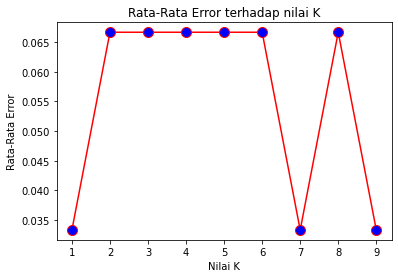

In [11]:
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 20), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

Bisa dilihat dari grafik diatas yang memiliki tingkat eror yang kecil yaitu 2,3,4,5 maka nilai k yang diambil nantinya 4

Training

Menggunakan  nilai Konstanta K=4

In [18]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Evaluation

Mengecek akurasi model yang dibuat

In [19]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.87      1.00      0.93        13
   Virginica       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



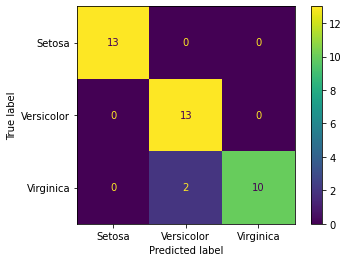

In [20]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot()